In [141]:
import matplotlib.pyplot as plt
from cmtj import Junction, Layer, CVector, ScalarDriver, AxialDriver, NullDriver, SolverMode
import numpy as np
from typing import List, Dict
# sphere points
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0 * pi:100j]
x = r * sin(phi) * cos(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(phi)


def plot_trajectory(log: Dict[str, List[float]], title: str):
    with plt.style.context(['science', 'no-latex']):
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        m = np.asarray([log[f'free_mx'], log[f'free_my'], log[f'free_mz']])
        ax.plot3D(m[0], m[1], m[2], color='blue')
        ax.set_axis_off()
        ax.plot_surface(x,
                        y,
                        z,
                        rstride=2,
                        cstride=2,
                        color='c',
                        alpha=0.3,
                        linewidth=0.1)
        ax.scatter([0], [0], [1], color='crimson', alpha=1.0, s=50)
        fig.savefig(f"{title}.png")


In [145]:
from tqdm import tqdm

demagTensor = [CVector(0., 0., 0.), CVector(0., 0., 0.), CVector(0., 0., 1.0)]

damping = 0.03
beta = 1
spinPolarisation = 1.0

l1 = Layer.createSTTLayer(id="free",
                          mag=CVector(0., 0., 1.),
                          anis=CVector(0, 0., 1.),
                          Ms=1.65,
                          thickness=1.4e-9,
                          cellSurface=7e-10 * 7e-10,
                          demagTensor=demagTensor,
                          damping=damping,
                          SlonczewskiSpacerLayerParameter=1.0,
                          spinPolarisation=spinPolarisation,
                          beta=beta)

l1.setReferenceLayer(CVector(1., 0., 0.))

mean_mr = []
cscan = np.logspace(5, 30, base=2)
for currentDensity in tqdm(cscan):
    junction = Junction([l1], "", Rp=100, Rap=200)

    junction.setLayerAnisotropyDriver("free",
                                      ScalarDriver.getConstantDriver(7e4))
    junction.clearLog()
    junction.setLayerCurrentDriver(
        "free", ScalarDriver.getConstantDriver(currentDensity))

    junction.runSimulation(500e-9, 4e-12, 4e-12, False, False)

    mr = junction.getLog()["R"]
    mean_mr.append(np.mean(mr))

100%|██████████| 50/50 [00:03<00:00, 13.78it/s]


In [201]:
from cmtj import Reference
l1 = Layer.createSTTLayer(id="free",
                          mag=CVector(1., 0., 0.),
                          anis=CVector(1, 0., 0.),
                          Ms=1.65,
                          thickness=1.4e-9,
                          cellSurface=7e-10 * 7e-10,
                          demagTensor=demagTensor,
                          damping=damping,
                          SlonczewskiSpacerLayerParameter=1.0,
                          spinPolarisation=spinPolarisation,
                          beta=beta)
r = CVector(-1., 0., 0.)
l1.setReferenceLayer(CVector(-1., 0., 0.))
junction = Junction([l1], "", Rp=100, Rap=200)

# junction.clearLog()
# junction.setLayerAnisotropyDriver("free", ScalarDriver.getConstantDriver(1e4))
criticalDensity = 1e13
junction.runSimulation(100e-9, 1e-12, 1e-12, False, False)
# junction.setLayerCurrentDriver(
        # "free", ScalarDriver.getConstantDriver(criticalDensity, 30e-9, 35e-9))
# plot_trajectory(junction.getLog(), "")

TypeError: setReferenceLayer(): incompatible function arguments. The following argument types are supported:
    1. (self: cmtj.Layer, arg0: cmtj.CVector) -> None
    2. (self: cmtj.Layer, arg0: cmtj.Reference) -> None

Invoked with: <cmtj.Layer object at 0x14807ac30>, 1

In [200]:
from cmtj import Reference
dir(Reference), Reference.fixed

(['__class__',
  '__delattr__',
  '__dir__',
  '__doc__',
  '__entries',
  '__eq__',
  '__format__',
  '__ge__',
  '__getattribute__',
  '__getstate__',
  '__gt__',
  '__hash__',
  '__index__',
  '__init__',
  '__init_subclass__',
  '__int__',
  '__le__',
  '__lt__',
  '__members__',
  '__module__',
  '__ne__',
  '__new__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__setattr__',
  '__setstate__',
  '__sizeof__',
  '__str__',
  '__subclasshook__',
  'bottom',
  'fixed',
  'name',
  'none',
  'top',
  'value'],
 <Reference.fixed: 1>)

In [197]:
junction.getLog()["R"]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

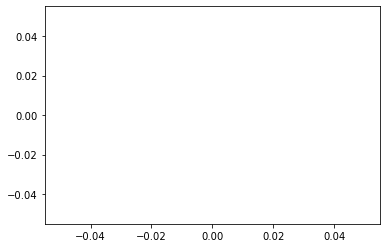

In [179]:
plt.plot(junction.getLog()["R"])

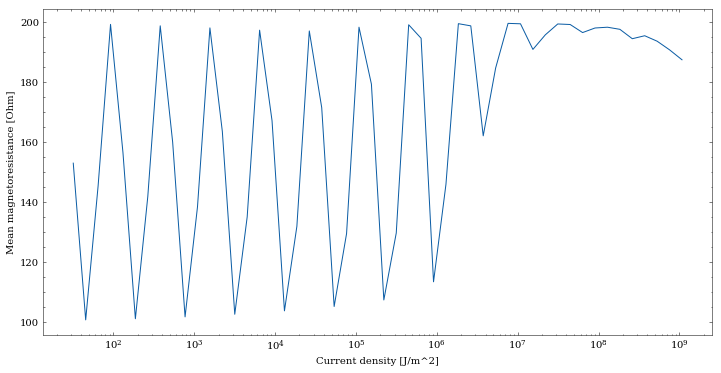

In [140]:
with plt.style.context(['science', 'no-latex']):
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(cscan, mean_mr)
    ax.set_xscale("log")
    ax.set_xlabel("Current density [J/m^2]")
    ax.set_ylabel("Mean magnetoresistance [Ohm]")